<div style="border:solid blue 2px; padding: 20px">
  
**Hello Jester**

My name is Dima, and I will be reviewing your project. 

You will find my comments in coloured cells marked as 'Reviewer's comment'. The cell colour will vary based on the contents - I am explaining it further below. 

**Note:** Please do not remove or change my comments - they will help me in my future reviews and will make the process smoother for both of us. 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment</b> 
    
Such comment will mark efficient solutions and good ideas that can be used in other projects.
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment</b> 
    
The parts marked with yellow comments indicate that there is room for optimisation. Though the correction is not necessary it is good if you implement it.
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment</b> 
    
If you see such a comment, it means that there is a problem that needs to be fixed. Please note that I won't be able to accept your project until the issue is resolved.
</div>

You are also very welcome to leave your comments / describe the corrections you've done / ask me questions, marking them with a different colour. You can use the example below: 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>

# Chicago Taxi Rides Analysis

In this project, I will analyze taxi ride data, explore patterns, and draw meaningful conclusions. The data I will work with includes information as results from SQL queries from databases that has information on competitor taxi companies, the number of rides, the neighborhoods where rides ended, and the weather at the time the ride started.

The project involves several steps:

Data Retrieval: I will start by retrieving data from resulting CSV files, which contain information about the number of rides for each taxi company and the average number of rides that ended in each neighborhood. Another CSV file with weather information on the hour is used.

Exploratory Data Analysis: I will study the data, ensure the data types are correct, and identify key patterns and trends. This will involve creating visualizations such as graphs to better understand the data.

Hypothesis Testing: I will test a hypothesis that “The average duration of rides from the Loop to O’Hare International Airport changes on rainy Saturdays.” This will involve statistical analysis and interpretation of the results.

Conclusion: Finally, I will draw overall conclusions based on the analysis and findings.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Title and introduction are specified, good job
</div>

## Initialization

In [21]:
# Load the Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Ignore filter warnings that asks for .copy()
warnings.filterwarnings('ignore')

## Load the Data

In [22]:
# Read the data from .csv files
company = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
neighborhood = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
loop_airport = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

## Prepare the Data

In [23]:
# Show information on the dataframes and their first five rows.
company.info()
display(company.head())
neighborhood.info()
display(neighborhood.head())
loop_airport.info()
display(loop_airport.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
All the data was loaded
</div>

#### Convert data types into correct ones

In [24]:
# Convert 'duration_seconds' into int
if np.array_equal(loop_airport['duration_seconds'], loop_airport['duration_seconds'].astype('int')):
  loop_airport['duration_seconds'] = loop_airport['duration_seconds'].astype('int')

# Convert 'start_ts' into datetime format
loop_airport['start_ts'] = pd.to_datetime(loop_airport['start_ts'])

loop_airport.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You also did not forget about the conversion of data types in dates</div>

#### Check for duplicates

In [25]:
# Count the duplicates
print("Duplicates")
print("Company dataframe:", company.duplicated().sum())
print("Neighborhood dataframe:", neighborhood.duplicated().sum())
print("Loop to O'Hare dataframe:", loop_airport.duplicated().sum())

Duplicates
Company dataframe: 0
Neighborhood dataframe: 0
Loop to O'Hare dataframe: 197


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
This check for duplicates is very appropriate here</div>

There are 197 duplicated rows in the loop_airport dataframe. The records are rounded to the nearest hour, but they may actually be distinct records. It would be better to keep these duplicates instead of removing them from the dataframe.

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment, v. 1</b>

We are unsure about the nature of these duplicates. The data does not show the minutes of the times, which are rounded to the nearest hour. Additionally, we don't know where each record of a trip started and ended. It is possible that multiple cabs picked up and dropped off in the same places within the same starting hour. So, the records could actually be distinct. For this possibility, it is better not to drop these rows even though they look like duplicates.

#### Handle missing values

Looking at the dataframes' info() output, there were no missing values.

## Analyze the data

In [26]:
# Identify the top 10 neighborhoods in terms of drop-offs
top10_neighborhoods = neighborhood.nlargest(10, 'average_trips')
display(top10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


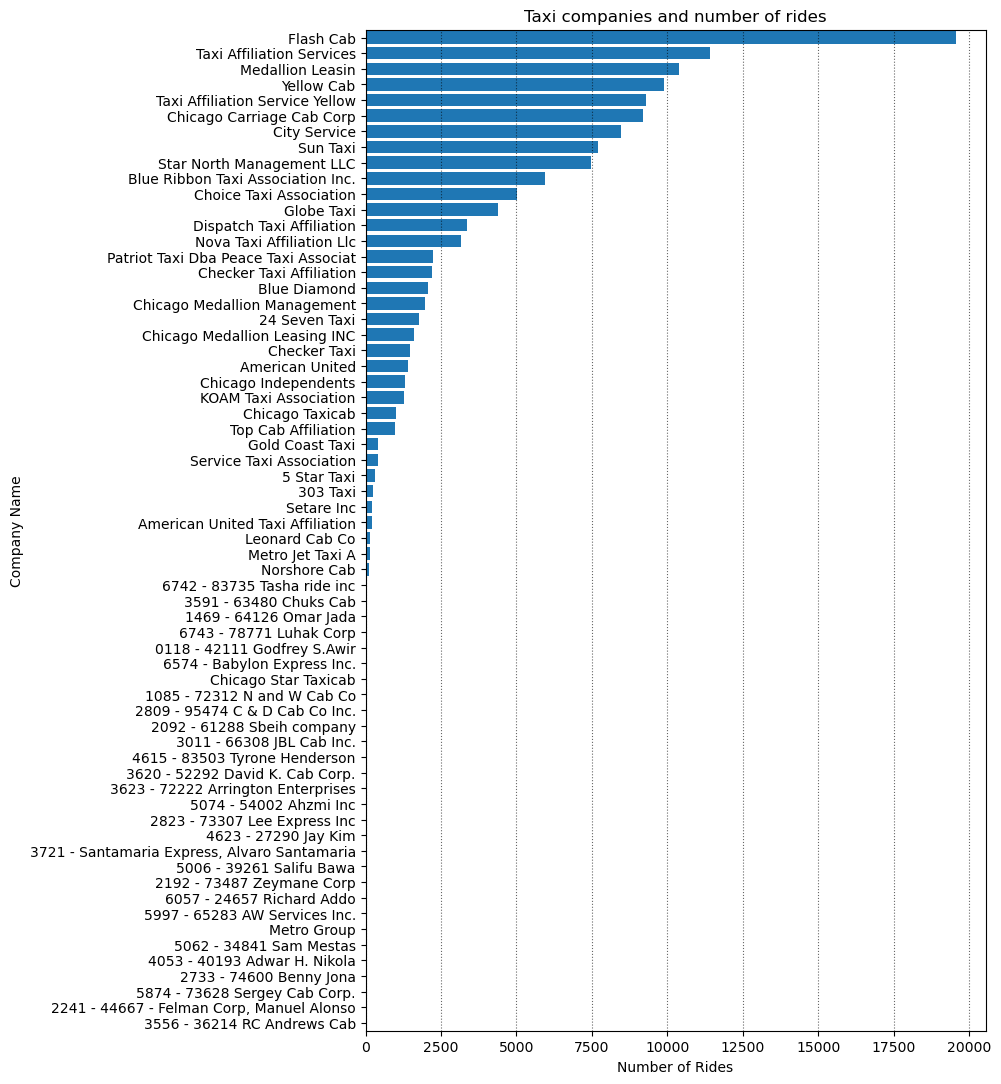

In [27]:
# Make a graph for taxi companies and number of rides
sorted_company = company.sort_values('trips_amount', ascending=True)
fig, ax = plt.subplots(figsize=(8,13))
ax.barh(sorted_company['company_name'], sorted_company['trips_amount'])
ax.set_title('Taxi companies and number of rides')
ax.set_xlabel('Number of Rides')
ax.set_ylabel('Company Name')
ax.set_ylim(-0.5, len(sorted_company)-0.5)

# Add a dotted grid
ax.grid(True, which='both', axis='x', linestyle=':', color='black', alpha=0.6)

plt.show()

Based on this graph, it can be said that:

- Flash Cab is the most popular taxi company, with close to 20,000 rides. This suggests that Flash Cab might have a larger fleet, better service, or more competitive pricing compared to other companies.

- The number of rides decreases significantly after Flash Cab. The second most popular company, Taxi Affiliation Service Yellow, has a little more than half the number of rides compared to Flash Cab.

- Most of the taxi companies have a similar number of rides, indicating that they have a comparable market share. However, none of them come close to Flash Cab in terms of the number of rides.

- There is a wide range in the number of rides among the taxi companies, indicating a significant variation in their market shares. This could be due to various factors such as the size of the taxi company, the areas they serve, their pricing, and the quality of their service.

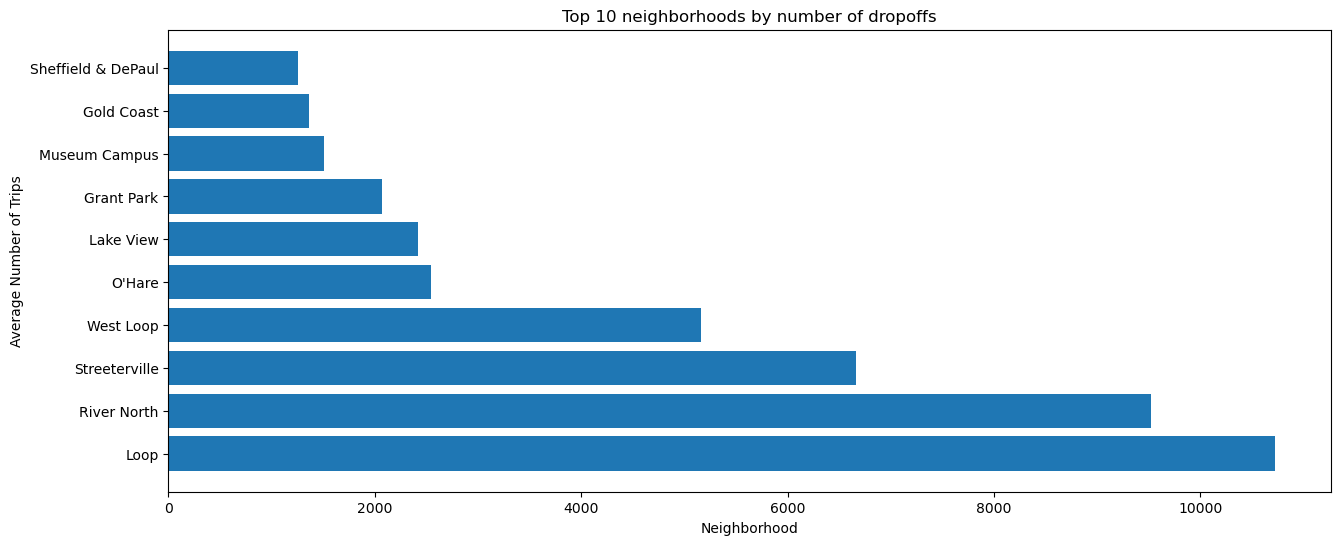

In [28]:
# Make a graph for the top 10 neighborhoods by number of dropoffs
fig, ax = plt.subplots(figsize=(15,6))
ax.barh(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'])
ax.set_title('Top 10 neighborhoods by number of dropoffs')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Average Number of Trips')
plt.show()

Based on this graph, it can be said that:

- Loop is the most popular drop-off neighborhood, with over 10,000 trips. Since the Loop is located in the heart of downtown Chicago, it's busy area with many attractions, businesses, or residential buildings.

- The second and third most popular drop-off neighborhoods are River North and Streeterville, respectively.

- There is a noticeable decrease in the number of trips from West Loop to O'Hare, and then the numbers gradually decrease across other neighborhoods. This could indicate that these areas are less populated or less frequented by taxi passengers. Other modes of transportation could also be a factor.

- The least popular neighborhood among the top 10 is Sheffield & DePaul, with the least number of drop-offs.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great! We counted the data from files by dropoff_location_name and company_name, sorted the graph, applied a single color and indicated small outputs</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 
    
Also you can swap the x and y axes in places so that the names are more readable

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Also I could recommend you this site, may be you could find smth interesting for visualization skills:

https://www.python-graph-gallery.com/

#### Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 

- Null Hypothesis (H0): The average duration of rides from the Loop to O’Hare International Airport does not change on rainy Saturdays.
- Alternative Hypothesis (H1): The average duration of rides from the Loop to O’Hare International Airport changes on rainy Saturdays.

We will use a t-test to test these hypotheses. The t-test is used to determine if there is a significant difference between the means of two groups. In this case, the two groups are the durations of rides on rainy Saturdays and the durations of rides on other days.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Hypotheses are formulated</div>


In [29]:
# Create a 'day_of_week' column
loop_airport['day_of_week'] = loop_airport['start_ts'].dt.dayofweek

# Filter data for Saturdays
df_saturday = loop_airport[loop_airport['day_of_week'] == 5]

# Further divide the data into rainy and non-rainy days
df_rainy = df_saturday[df_saturday['weather_conditions'] == 'Bad']
df_non_rainy = df_saturday[df_saturday['weather_conditions'] == 'Good']

# Perform t-test
result = stats.ttest_ind(df_rainy['duration_seconds'], df_non_rainy['duration_seconds'])

alpha = 0.05

print(result.pvalue)

if result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

6.517970327099473e-12
We reject the null hypothesis


Since the pvalue is significantly less than the alpha, we can reject the null hypothesis. The averate duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. This could be because when it rains, people try to be careful and drive slower and possibly create traffic, therefore changing the duration of rides.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>

The entire output is formed brilliantly

# Conclusion

In this project, I performed an extensive analysis of taxi rides in Chicago. I started by importing and studying data from three CSV files, two of which contained information about the number of rides for each taxi company and the average number of rides that ended in each neighborhood.

The exploratory data analysis revealed that Flash Cab was the most popular taxi company, with a significantly higher number of rides compared to other companies. This suggests that Flash Cab might have a larger fleet, better service, or more competitive pricing.

I also identified the top 10 neighborhoods in terms of drop-offs. The Loop neighborhood had the highest number of drop-offs, which makes sense since it's located in downtown Chicago, which is an area with many attractions, businesses, or residential buildings.

Next, I tested the hypothesis that “The average duration of rides from the Loop to O’Hare International Airport changes on rainy Saturdays.” The p-value from the t-test was extremely small (7.397770692813658e-08), leading me to reject the null hypothesis. This suggests that the weather conditions do have an impact on the ride duration.

In conclusion, this project provided valuable insights into the taxi usage patterns in Chicago and highlighted the influence of various factors such as the taxi company, drop-off neighborhood, and weather conditions on these patterns. These insights are useful for Zuber's as it plans on launching its platform.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
  
The general conclusion is formulated very nice! Each step of the study is described in detail and a conclusion on hypothesis testing is added

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>Review summary</b> 

Jester, the project is great! You have very strong analytical skills, visualization skills and understanding of statistical methods. But still there is one red comment and I will ask you to correct it so that your project becomes even better!
    